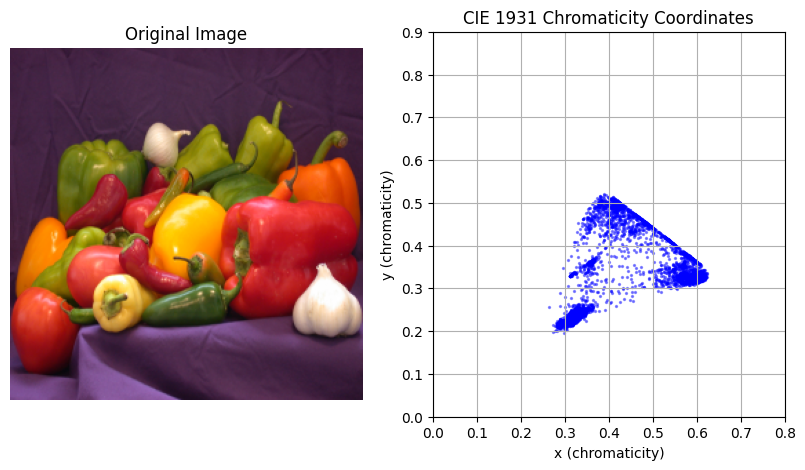

In [20]:
# 1)Plot the chromaticity coordinates of the pixels of an image on the CIE 1931 diagram.

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread("peppers.png")

img_bgr = cv2.resize(img_bgr, (256, 256))

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) / 255.0

def srgb_to_linear(srgb):
    a = 0.055
    return np.where(srgb <= 0.04045, srgb / 12.92, ((srgb + a) / (1 + a)) ** 2.4)

linear_rgb = srgb_to_linear(img_rgb)

M = np.array([
    [0.4124564, 0.3575761, 0.1804375],
    [0.2126729, 0.7151522, 0.0721750],
    [0.0193339, 0.1191920, 0.9503041]
])
xyz = linear_rgb @ M.T

X, Y, Z = xyz[..., 0], xyz[..., 1], xyz[..., 2]
denom = X + Y + Z + 1e-8
x = X / denom
y = Y / denom

x_flat = x.flatten()
y_flat = y.flatten()

max_points = 5000
if len(x_flat) > max_points:
    idx = np.random.choice(len(x_flat), max_points, replace=False)
    x_flat = x_flat[idx]
    y_flat = y_flat[idx]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Original Image")

# Chromaticity scatter plot
plt.subplot(1, 2, 2)
plt.scatter(x_flat, y_flat, s=2, color='blue', alpha=0.4)
plt.xlim(0, 0.8)
plt.ylim(0, 0.9)
plt.xlabel('x (chromaticity)')
plt.ylabel('y (chromaticity)')
plt.title('CIE 1931 Chromaticity Coordinates')
plt.grid(True)
plt.show()



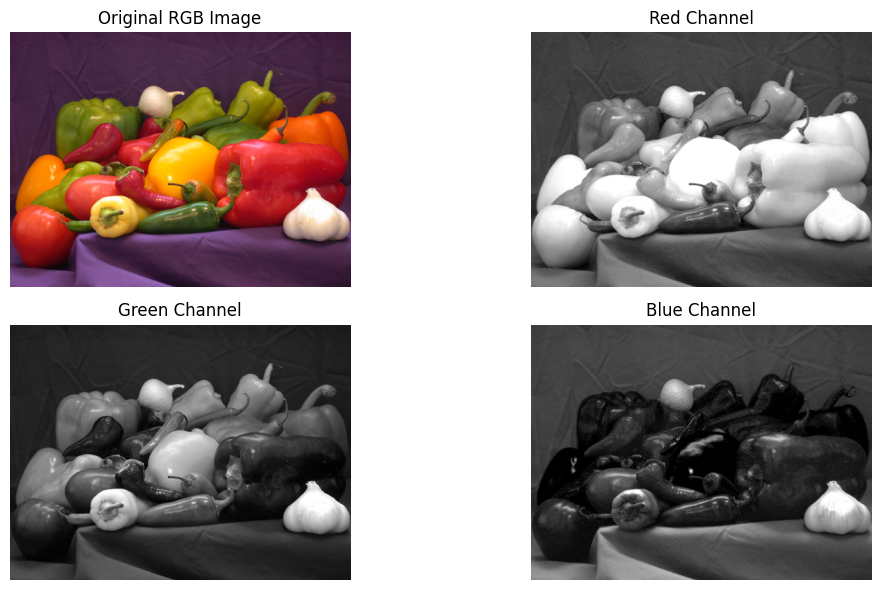

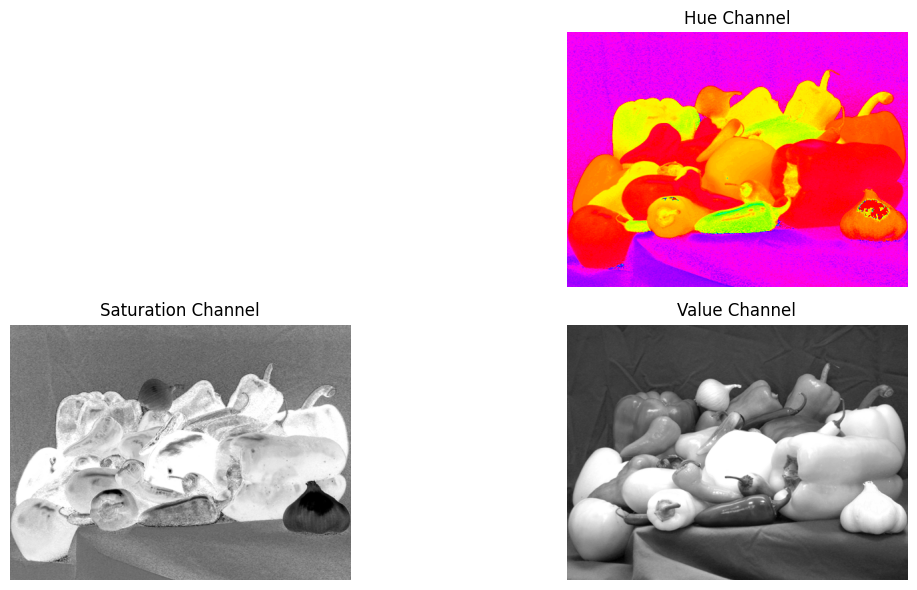

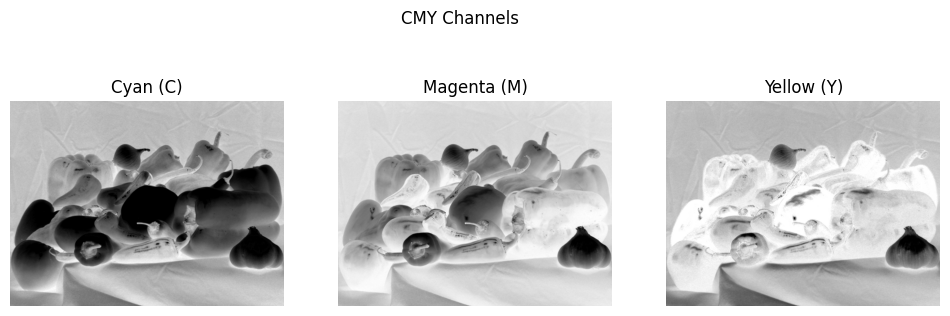

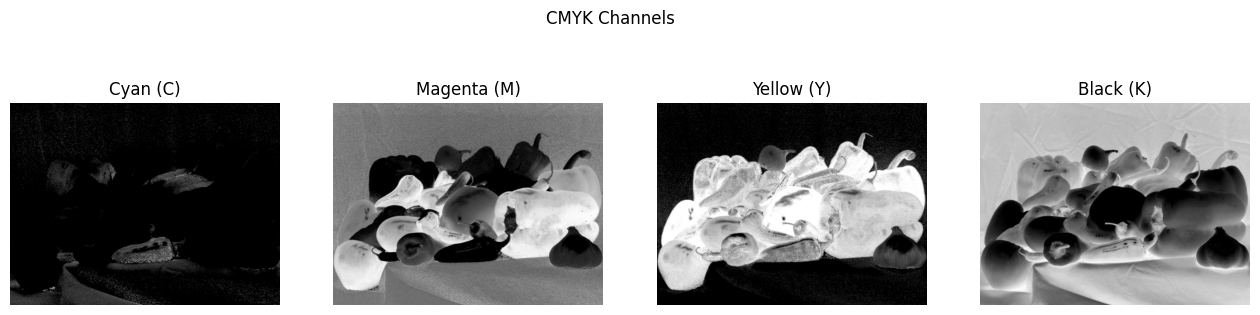

In [4]:
# 2) Analysis of images with different color models.

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('peppers.png')
# RGB Color Model
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
b, g, r = cv2.split(img)
plt.figure(figsize=(12, 6))

# Original RGB image
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')
# Red Channel
plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title('Red Channel')
plt.axis('off')
# Green Channel
plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title('Green Channel')
plt.axis('off')
# Blue Channel
plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')
plt.tight_layout()
plt.show()

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
 
# HSV Color Model

h, s, v = cv2.split(img_hsv)
plt.figure(figsize=(12, 6))
# Hue Channel
plt.subplot(2, 2, 2)
plt.imshow(h, cmap='hsv') 
plt.title('Hue Channel')
plt.axis('off')
# Saturation Channel
plt.subplot(2, 2, 3)
plt.imshow(s, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')
# Value Channel
plt.subplot(2, 2, 4)
plt.imshow(v, cmap='gray')
plt.title('Value Channel')
plt.axis('off')
 
plt.tight_layout()
plt.show()

# CMY and CMYK Color Model
def rgb_to_cmy(img_rgb):
    #Convert RGB image to CMY.
    c = 1 - img_rgb[:, :, 0] / 255.0
    m = 1 - img_rgb[:, :, 1] / 255.0
    y = 1 - img_rgb[:, :, 2] / 255.0
    return c, m, y 
def rgb_to_cmyk(img_rgb):
    #Convert RGB image to CMYK
    R = img_rgb[:, :, 0] / 255.0
    G = img_rgb[:, :, 1] / 255.0
    B = img_rgb[:, :, 2] / 255.0
 
    K = 1 - np.max([R, G, B], axis=0)
    denom = 1 - K + 1e-8  # prevent division by zero
    C = (1 - R - K) / denom
    M = (1 - G - K) / denom
    Y = (1 - B - K) / denom
 
    # Clamp between 0 and 1
    C = np.clip(C, 0, 1)
    M = np.clip(M, 0, 1)
    Y = np.clip(Y, 0, 1)
    K = np.clip(K, 0, 1)
 
    return C, M, Y, K

def show_channel(channel, title):
    #Display a single channel.
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')

	
# Convert to CMY and CMYK
C, M, Y = rgb_to_cmy(img_rgb)
Ck, Mk, Yk, K = rgb_to_cmyk(img_rgb)
# Plot CMY channels
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
show_channel(C, 'Cyan (C)')
plt.subplot(1, 3, 2)
show_channel(M, 'Magenta (M)') 
plt.subplot(1, 3, 3)
show_channel(Y, 'Yellow (Y)') 
plt.suptitle('CMY Channels')
plt.show()
# Plot CMYK channels
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
show_channel(Ck, 'Cyan (C)')
plt.subplot(1, 4, 2)
show_channel(Mk, 'Magenta (M)')
plt.subplot(1, 4, 3)
show_channel(Yk, 'Yellow (Y)')
plt.subplot(1, 4, 4)
show_channel(K, 'Black (K)')
plt.suptitle('CMYK Channels')
plt.show()





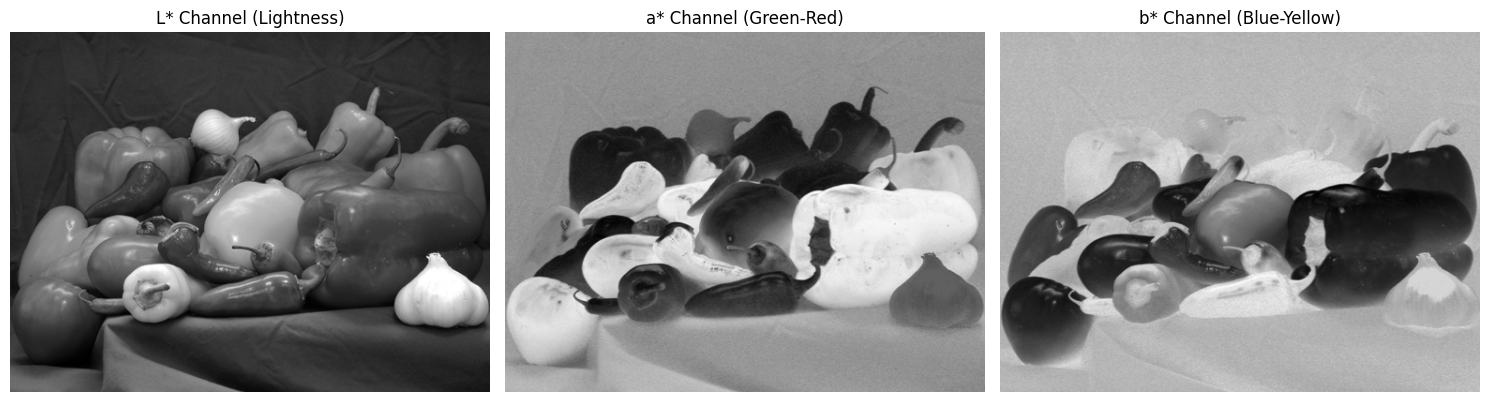

In [ ]:
# 3)Create two synthetic images with different RGB values but perceptually similar when converted to LAB.

import cv2
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

image = cv2.imread('peppers.png')

lab_image = color.rgb2lab(image)

if image.shape[-1] == 3: 
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
else: 
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
lab_image_cv2 = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2LAB)

l_channel = lab_image[:,:,0]
a_channel = lab_image[:,:,1]
b_channel = lab_image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Display the L* channel
axes[0].imshow(l_channel, cmap='gray')
axes[0].set_title('L* Channel (Lightness)')
axes[0].axis('off')
# Display the a* channel
axes[1].imshow(a_channel, cmap='gray')
axes[1].set_title('a* Channel (Green-Red)')
axes[1].axis('off')
# Display the b* channel
axes[2].imshow(b_channel, cmap='gray')
axes[2].set_title('b* Channel (Blue-Yellow)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


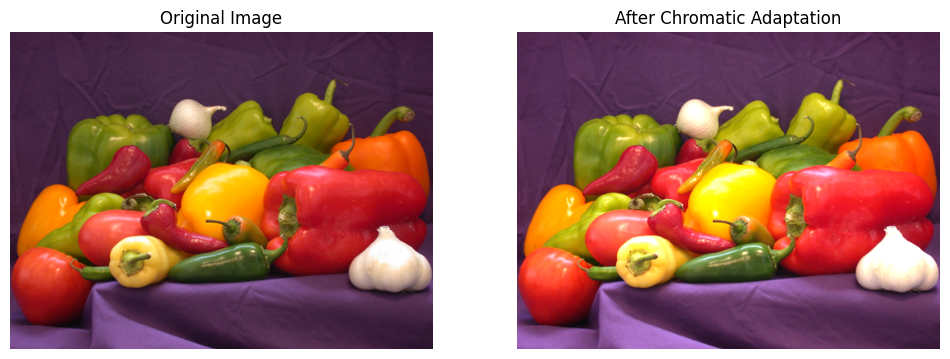

In [ ]:
# 5) Apply chromatic adaptation transform (Bradford or von Kries) on industrial images to demonstrate constancy.
import cv2
import numpy as np
import matplotlib.pyplot as plt

def chromatic_adaptation(img, source_white, target_white):
    """
    Apply simple chromatic adaptation using scaling factors (Von Kries model).

    Parameters:
        img: Input image as a numpy array
        source_white: Array-like [R, G, B] for the source white reference
        target_white: Array-like [R, G, B] for the target white reference
    """
    result = img.copy().astype(np.float32)

    scale_r = target_white[0] / source_white[0]
    scale_g = target_white[1] / source_white[1]
    scale_b = target_white[2] / source_white[2]

    result[:, :, 0] = result[:, :, 0] * scale_b
    result[:, :, 1] = result[:, :, 1] * scale_g
    result[:, :, 2] = result[:, :, 2] * scale_r

    result = np.clip(result, 0, 255).astype(np.uint8)

    return result

image = cv2.imread("peppers.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

source_white = [200, 200, 200]  
target_white = [255, 255, 255]  

adapted_image = chromatic_adaptation(image, source_white, target_white)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(adapted_image)
plt.title('After Chromatic Adaptation')
plt.axis('off')
plt.show()


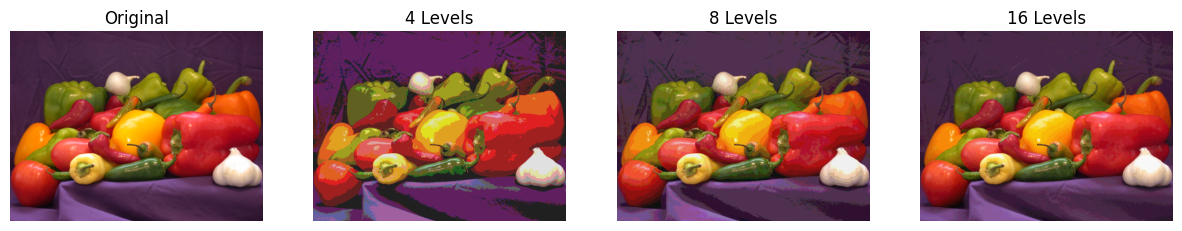

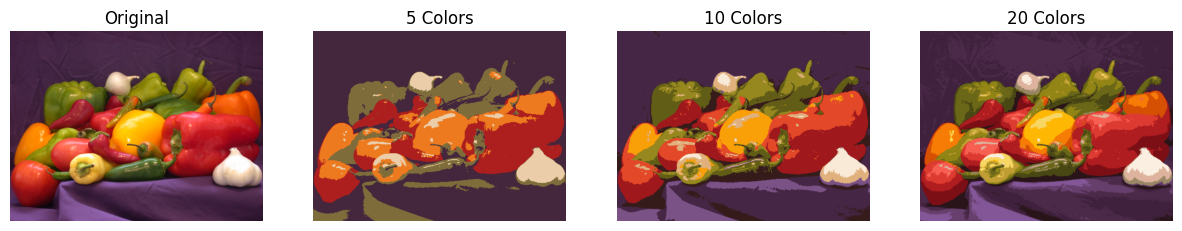

In [ ]:
# 4) Perform gray-level and color image quantization.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (BGR to RGB for display)
img = cv2.imread('peppers.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Function for uniform quantization
def uniform_quantization(image, levels):
    factor = 256 // levels
    quantized = (image // factor) * factor + factor // 2
    return quantized.astype(np.uint8)

# Apply quantization with different levels
q4 = uniform_quantization(img, 4)   # 4 levels per channel
q8 = uniform_quantization(img, 8)   # 8 levels per channel
q16 = uniform_quantization(img, 16) # 16 levels per channel

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q4); axs[1].set_title("4 Levels"); axs[1].axis("off")
axs[2].imshow(q8); axs[2].set_title("8 Levels"); axs[2].axis("off")
axs[3].imshow(q16); axs[3].set_title("16 Levels"); axs[3].axis("off")
plt.show()

from sklearn.cluster import KMeans

def kmeans_quantization(image, k):
    # Reshape image to (num_pixels, 3)
    pixels = image.reshape(-1, 3)
    
    # Apply K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    
    # Replace pixel values with cluster centers
    new_colors = kmeans.cluster_centers_.astype(np.uint8)
    quantized = new_colors[labels].reshape(image.shape)
    
    return quantized

# Apply K-means with different numbers of colors
q5 = kmeans_quantization(img, 5)
q10 = kmeans_quantization(img, 10)
q20 = kmeans_quantization(img, 20)

# Show results
fig, axs = plt.subplots(1, 4, figsize=(15,5))
axs[0].imshow(img); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(q5); axs[1].set_title("5 Colors"); axs[1].axis("off")
axs[2].imshow(q10); axs[2].set_title("10 Colors"); axs[2].axis("off")
axs[3].imshow(q20); axs[3].set_title("20 Colors"); axs[3].axis("off")
plt.show()


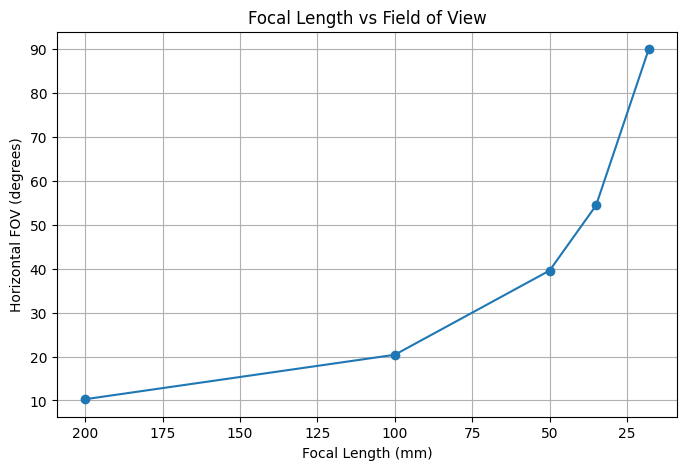

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def field_of_view(sensor_width, focal_length):
    """Compute horizontal FOV in degrees"""
    return 2 * np.degrees(np.arctan(sensor_width / (2 * focal_length)))

# Example: Full-frame sensor (36 mm width)
sensor_width = 36  
focal_lengths = [18, 35, 50, 100, 200]

fovs = [field_of_view(sensor_width, f) for f in focal_lengths]

plt.figure(figsize=(8,5))
plt.plot(focal_lengths, fovs, marker='o')
plt.title("Focal Length vs Field of View")
plt.xlabel("Focal Length (mm)")
plt.ylabel("Horizontal FOV (degrees)")
plt.gca().invert_xaxis()  
plt.grid(True)
plt.show()


Near focus: 1.88 m, Far focus: 2.14 m, DOF: 0.26 m


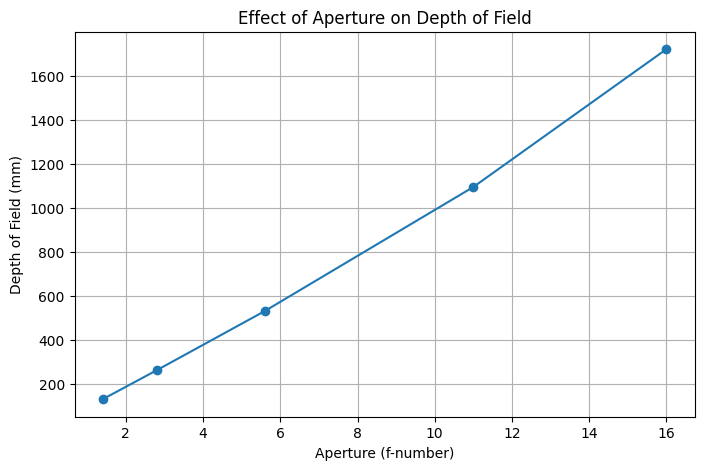

In [15]:
def depth_of_field(f, N, c, d):
    """Compute near DOF, far DOF, and total DOF"""
    H = (f**2) / (N * c) + f  # Hyperfocal distance
    near = (H * d) / (H + (d - f))
    far = (H * d) / (H - (d - f)) if d < H else np.inf
    return near, far, far - near if far != np.inf else np.inf

# Example: 50mm lens, f/2.8, full-frame sensor
f = 50       # focal length (mm)
N = 2.8      # aperture (f-number)
c = 0.03     # CoC for full-frame
d = 2000     # subject distance (mm) = 2 m

near, far, dof = depth_of_field(f, N, c, d)
print(f"Near focus: {near/1000:.2f} m, Far focus: {far/1000:.2f} m, DOF: {dof/1000:.2f} m")


# Aperture Effect Visualization

apertures = [1.4, 2.8, 5.6, 11, 16]
dof_values = [depth_of_field(f, N, c, d)[2] for N in apertures]

plt.figure(figsize=(8,5))
plt.plot(apertures, dof_values, marker='o')
plt.title("Effect of Aperture on Depth of Field")
plt.xlabel("Aperture (f-number)")
plt.ylabel("Depth of Field (mm)")
plt.grid(True)
plt.show()

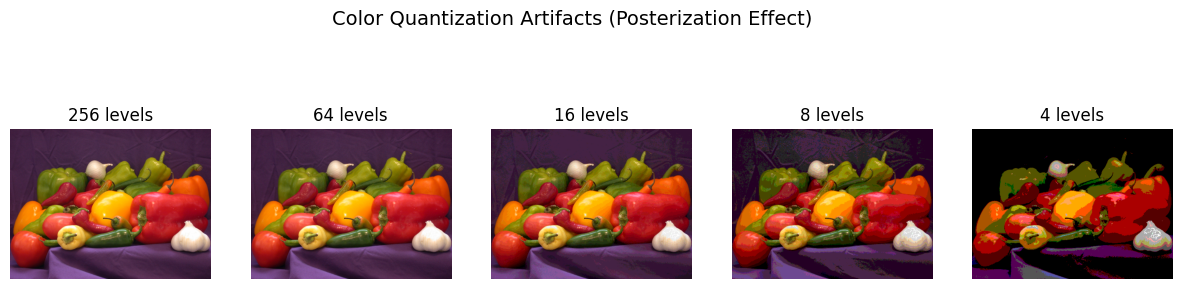

In [ ]:
#1)	Analyze two real-world examples where improper calibration or quantization causes visible artifacts.

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("peppers.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.astype(np.float32) / 255.0

# Function to quantize image
def quantize_image(img, n_levels):
    img_q = np.floor(img * (n_levels - 1)) / (n_levels - 1)
    img_q = np.clip(img_q, 0, 1) 
    return img_q.astype(np.float32)

# Quantize image to different bit levels
levels = [256, 64, 16, 8, 4]
fig, axes = plt.subplots(1, len(levels), figsize=(15, 4))

for i, lvl in enumerate(levels):
    img_q = quantize_image(image, lvl)
    axes[i].imshow(img_q)
    axes[i].axis('off')
    axes[i].set_title(f'{lvl} levels')

plt.suptitle("Color Quantization Artifacts (Posterization Effect)", fontsize=14)
plt.show()





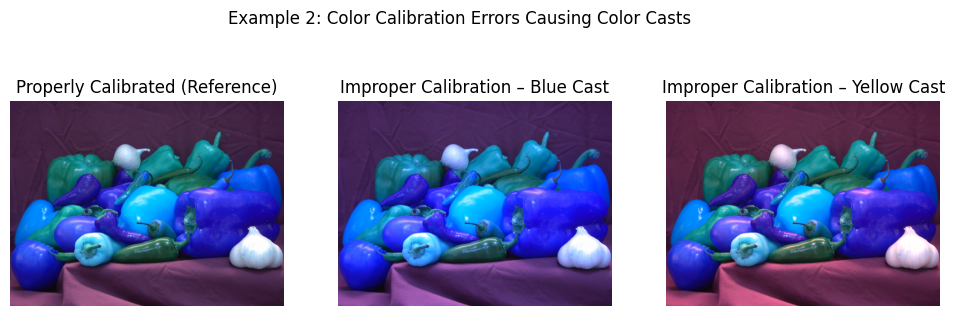

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

img = cv2.imread("peppers.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Simulate white balance / calibration errors
blue_cast = img.copy().astype(np.float32)
blue_cast[:, :, 0] *= 1.3  # Increase blue channel (cool tone)

yellow_cast = img.copy().astype(np.float32)
yellow_cast[:, :, 2] *= 1.3  # Increase red channel (warm tone)

blue_cast = np.clip(blue_cast, 0, 255).astype(np.uint8)
yellow_cast = np.clip(yellow_cast, 0, 255).astype(np.uint8)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Properly Calibrated (Reference)")
ax[1].imshow(cv2.cvtColor(blue_cast, cv2.COLOR_BGR2RGB))
ax[1].set_title("Improper Calibration – Blue Cast")
ax[2].imshow(cv2.cvtColor(yellow_cast, cv2.COLOR_BGR2RGB))
ax[2].set_title("Improper Calibration – Yellow Cast")
for a in ax: a.axis("off")
plt.suptitle("Example 2: Color Calibration Errors Causing Color Casts")
plt.show()


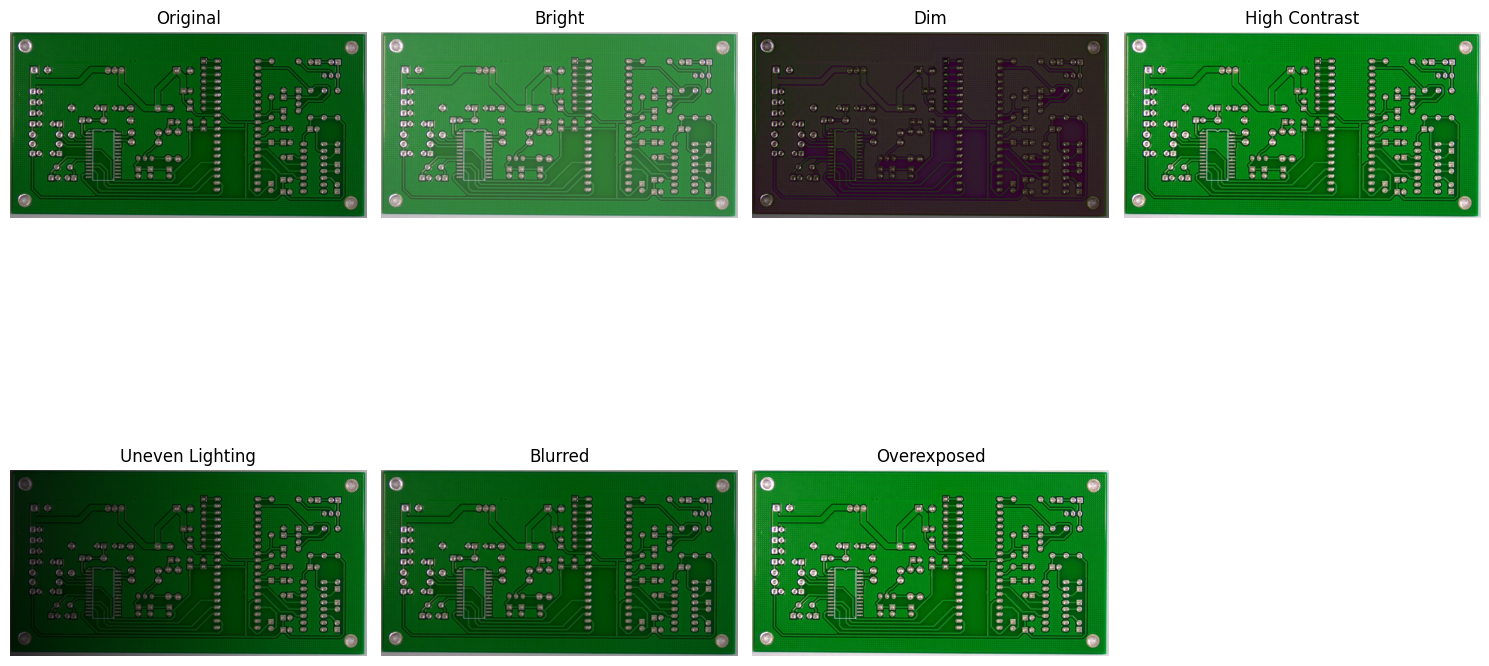

In [ ]:
# 2)Obtain or simulate an industrial dataset (e.g., machine parts, PCB boards, mechanical tools) captured under: Different lighting conditions (bright, dim, directional, uneven illumination) and Different lens parameters (focal length, aperture, exposure time).
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("pcb.jpg")  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  


def adjust_brightness_contrast(image, brightness=0, contrast=0):
    img = cv2.convertScaleAbs(image, alpha=1 + contrast / 100, beta=brightness)
    return img

def change_exposure(image, factor):
    img = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return img

def apply_blur(image, kernel_size):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

def uneven_illumination(image):
    h, w, _ = image.shape
    gradient = np.linspace(0.3, 1.2, w)
    mask = np.tile(gradient, (h, 1))
    img = (image * mask[..., np.newaxis]).clip(0, 255).astype(np.uint8)
    return img

bright = adjust_brightness_contrast(img, brightness=50)
dim = adjust_brightness_contrast(img, brightness=-50)
high_contrast = adjust_brightness_contrast(img, contrast=50)
uneven_light = uneven_illumination(img)
blurred = apply_blur(img, 9)
exposed = change_exposure(img, 1.5)

titles = ['Original', 'Bright', 'Dim', 'High Contrast', 'Uneven Lighting', 'Blurred', 'Overexposed']
images = [img, bright, dim, high_contrast, uneven_light, blurred, exposed]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
